In [ ]:
# download shapefile
! curl --output "india_2011_dist.json" "https://raw.githubusercontent.com/HindustanTimesLabs/shapefiles/master/india/district/india_2011_district.json"

In [1]:
# make data store folder
# ! md data_store

In [1]:
from module import Sentinel_2
import shapely
import geopandas as gpd

# Authentication credentials

In [ ]:

username = ""
password = ""

load india 2011 district shapefile

In [2]:
india_df = gpd.read_file('./india_2011_dist.json')

Select kolkata

<Axes: >

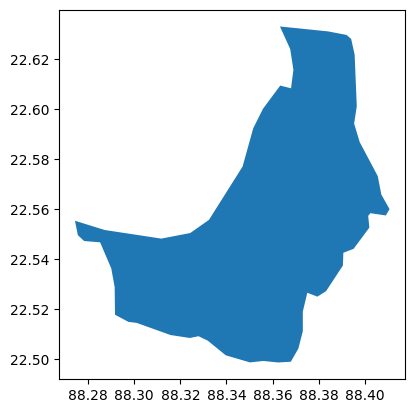

In [3]:
aoi = india_df[india_df["district"] == 'Kolkata']
aoi.plot()

create an instance of Sentinel_2 class


            filter bounds(BBox) :	 [88.274251 22.498531 88.41075  22.633158]
            filter date         :	 2023-02-01T00:00:00.000Z TO 2023-02-19T00:00:00.000Z
            search results      :	 10
            
200
S2B_MSIL1C_20230218T043839_N0509_R033_T45QXE_20230218T071152
S2B_MSIL1C_20230218T043839_N0509_R033_T45QXF_20230218T071152
S2A_MSIL1C_20230213T043911_N0509_R033_T45QXE_20230213T062621
S2A_MSIL1C_20230213T043911_N0509_R033_T45QXF_20230213T062621
S2B_MSIL1C_20230208T043939_N0509_R033_T45QXF_20230208T063318
S2B_MSIL1C_20230208T043939_N0509_R033_T45QXE_20230208T063318
S2A_MSIL1C_20230203T044011_N0509_R033_T45QXF_20230203T062520
S2A_MSIL1C_20230203T044011_N0509_R033_T45QXE_20230203T062520


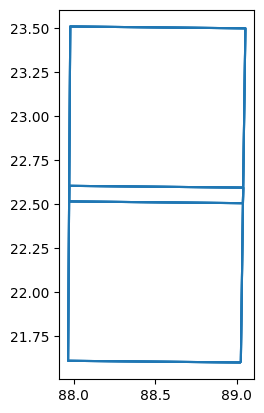

In [4]:
inst1 = Sentinel_2(username, password)
shapely_df = inst1.search_datasets(aoi=aoi,dateBounds = ["2023-02-01T00:00:00.000Z" , "2023-02-19T00:00:00.000Z"],rows=10)


In [5]:
# show search results
shapely_df

,tile_id,acquisition_date,tile_number,link,coords,area,cloudcoverpercentage,crs
0,S2B_MSIL1C_20230218T043839_N0509_R033_T45QXE_2...,2023-02-18 04:38:39,N0509_R033_T45QXE,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.02663 21.60271, 89.04084 22...",1.055346,82.615366,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...
1,S2B_MSIL1C_20230218T043839_N0509_R033_T45QXF_2...,2023-02-18 04:38:39,N0509_R033_T45QXF,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.03954 22.50577, 89.05450 23...",1.062121,22.258294,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...
2,S2A_MSIL1C_20230213T043911_N0509_R033_T45QXE_2...,2023-02-13 04:39:11,N0509_R033_T45QXE,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.02663 21.60271, 89.04084 22...",1.055346,0.000000,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...
3,S2A_MSIL1C_20230213T043911_N0509_R033_T45QXF_2...,2023-02-13 04:39:11,N0509_R033_T45QXF,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.03954 22.50577, 89.05450 23...",1.062121,0.000000,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...
4,S2B_MSIL1C_20230208T043939_N0509_R033_T45QXF_2...,2023-02-08 04:39:39,N0509_R033_T45QXF,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.03954 22.50577, 89.05450 23...",1.062121,5.681000,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...
5,S2B_MSIL1C_20230208T043939_N0509_R033_T45QXE_2...,2023-02-08 04:39:39,N0509_R033_T45QXE,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.02663 21.60271, 89.04084 22...",1.055346,3.187763,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...
6,S2A_MSIL1C_20230203T044011_N0509_R033_T45QXF_2...,2023-02-03 04:40:11,N0509_R033_T45QXF,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.03954 22.50577, 89.05450 23...",1.062121,0.000000,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...
7,S2A_MSIL1C_20230203T044011_N0509_R033_T45QXE_2...,2023-02-03 04:40:11,N0509_R033_T45QXE,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.02663 21.60271, 89.04084 22...",1.055346,0.000000,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...


Do query on GeoDataFrame and select tiles for download

In [6]:
shapely_df = shapely_df.sort_values(['cloudcoverpercentage','tile_number', 'acquisition_date'], ascending=[True, True, True]).groupby('tile_number').first().reset_index()

In [13]:
# selected tiles
shapely_df

,tile_number,tile_id,acquisition_date,link,coords,area,cloudcoverpercentage,crs
0,N0509_R033_T45QXE,S2A_MSIL1C_20230203T044011_N0509_R033_T45QXE_2...,2023-02-03 04:40:11,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.02663 21.60271, 89.04084 22...",1.055346,0.0,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...
1,N0509_R033_T45QXF,S2A_MSIL1C_20230203T044011_N0509_R033_T45QXF_2...,2023-02-03 04:40:11,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"MULTIPOLYGON (((89.03954 22.50577, 89.05450 23...",1.062121,0.0,+proj=utm +zone=45 +datum=WGS84 +units=m +no_d...


<Axes: >

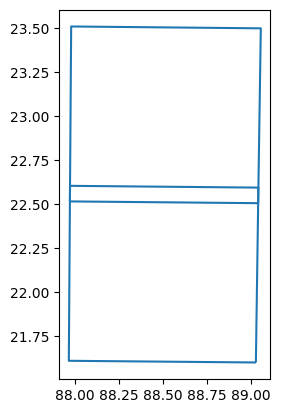

In [12]:
shapely_df.boundary.plot()

Download selected tiles

In [11]:
downloaded_files = inst1.downloadTiles(shapely_df[1:])

S2A_MSIL1C_20230203T044011_N0509_R033_T45QXF_20230203T062520


100%|██████████| 804M/804M [08:14<00:00, 1.63MiB/s]   


Extract ZIP files

In [19]:
extracted_file = inst1.extractZip(downloaded_files=downloaded_files)

./data_store/S2A_MSIL1C_20230203T044011_N0509_R033_T45QXE_20230203T062520.zip - file unzipped
./data_store/S2A_MSIL1C_20230203T044011_N0509_R033_T45QXF_20230203T062520.zip - file unzipped


Run mosaic

In [27]:
inst1.mosaic(extracted_files)

[<open DatasetReader name='./data_store/S2A_MSIL1C_20230203T044011_N0509_R033_T45QXE_20230203T062520.SAFE/GRANULE\L1C_T45QXE_A039784_20230203T044612\IMG_DATA\T45QXE_20230203T044011_B04.jp2' mode='r'>, <open DatasetReader name='./data_store/S2A_MSIL1C_20230203T044011_N0509_R033_T45QXF_20230203T062520.SAFE/GRANULE\L1C_T45QXF_A039784_20230203T044612\IMG_DATA\T45QXF_20230203T044011_B04.jp2' mode='r'>] [<open DatasetReader name='./data_store/S2A_MSIL1C_20230203T044011_N0509_R033_T45QXE_20230203T062520.SAFE/GRANULE\L1C_T45QXE_A039784_20230203T044612\IMG_DATA\T45QXE_20230203T044011_B08.jp2' mode='r'>, <open DatasetReader name='./data_store/S2A_MSIL1C_20230203T044011_N0509_R033_T45QXF_20230203T062520.SAFE/GRANULE\L1C_T45QXF_A039784_20230203T044612\IMG_DATA\T45QXF_20230203T044011_B08.jp2' mode='r'>]
mosaic done


compute NDVI

In [30]:
ndviFileName = inst1.computeNDVI()

'./data_store/1676816513_ndvi.tif'

Clip ndvi raster by aoi

In [33]:
inst1.clipByAoi(ndviFileName)

Output result

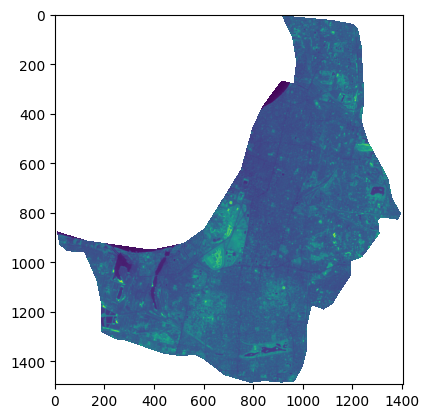

In [40]:
import matplotlib.pyplot as plt
import rasterio

ndvi = rasterio.open("./data_store/1676816513_clipped_ndvi.tif")
plt.imshow(ndvi.read(1))
